In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats import weightstats as stests
from numpy.polynomial.polynomial import polyfit
warnings.filterwarnings('ignore')

In [2]:
le = pd.read_csv('Dataset.csv', delimiter=',')
le.dataframeName = 'Dataset.csv'

In [3]:
le.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
le.describe()
le.info()
le

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                     2938 non-null object
Year                        2938 non-null int64
Status                      2938 non-null object
Life_Expectancy             2928 non-null float64
Adult_Mortality             2928 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2744 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2385 non-null float64
Measles                     2938 non-null int64
BMI                         2904 non-null float64
Under_Five_Deaths           2938 non-null int64
Polio                       2919 non-null float64
Tot_Exp                     2712 non-null float64
Diphtheria                  2919 non-null float64
HIV/AIDS                    2938 non-null float64
GDP                         2490 non-null float64
Population                  2286 non-null float64
thi

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
le.isnull().sum()*100/le.isnull().count()
country_list = le.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']


In [5]:
for country in country_list:
    le.loc[le['Country'] == country,fill_list] = le.loc[le['Country'] == country,fill_list].interpolate()
le.dropna(inplace=True)

In [6]:
le.isnull().sum()
le

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


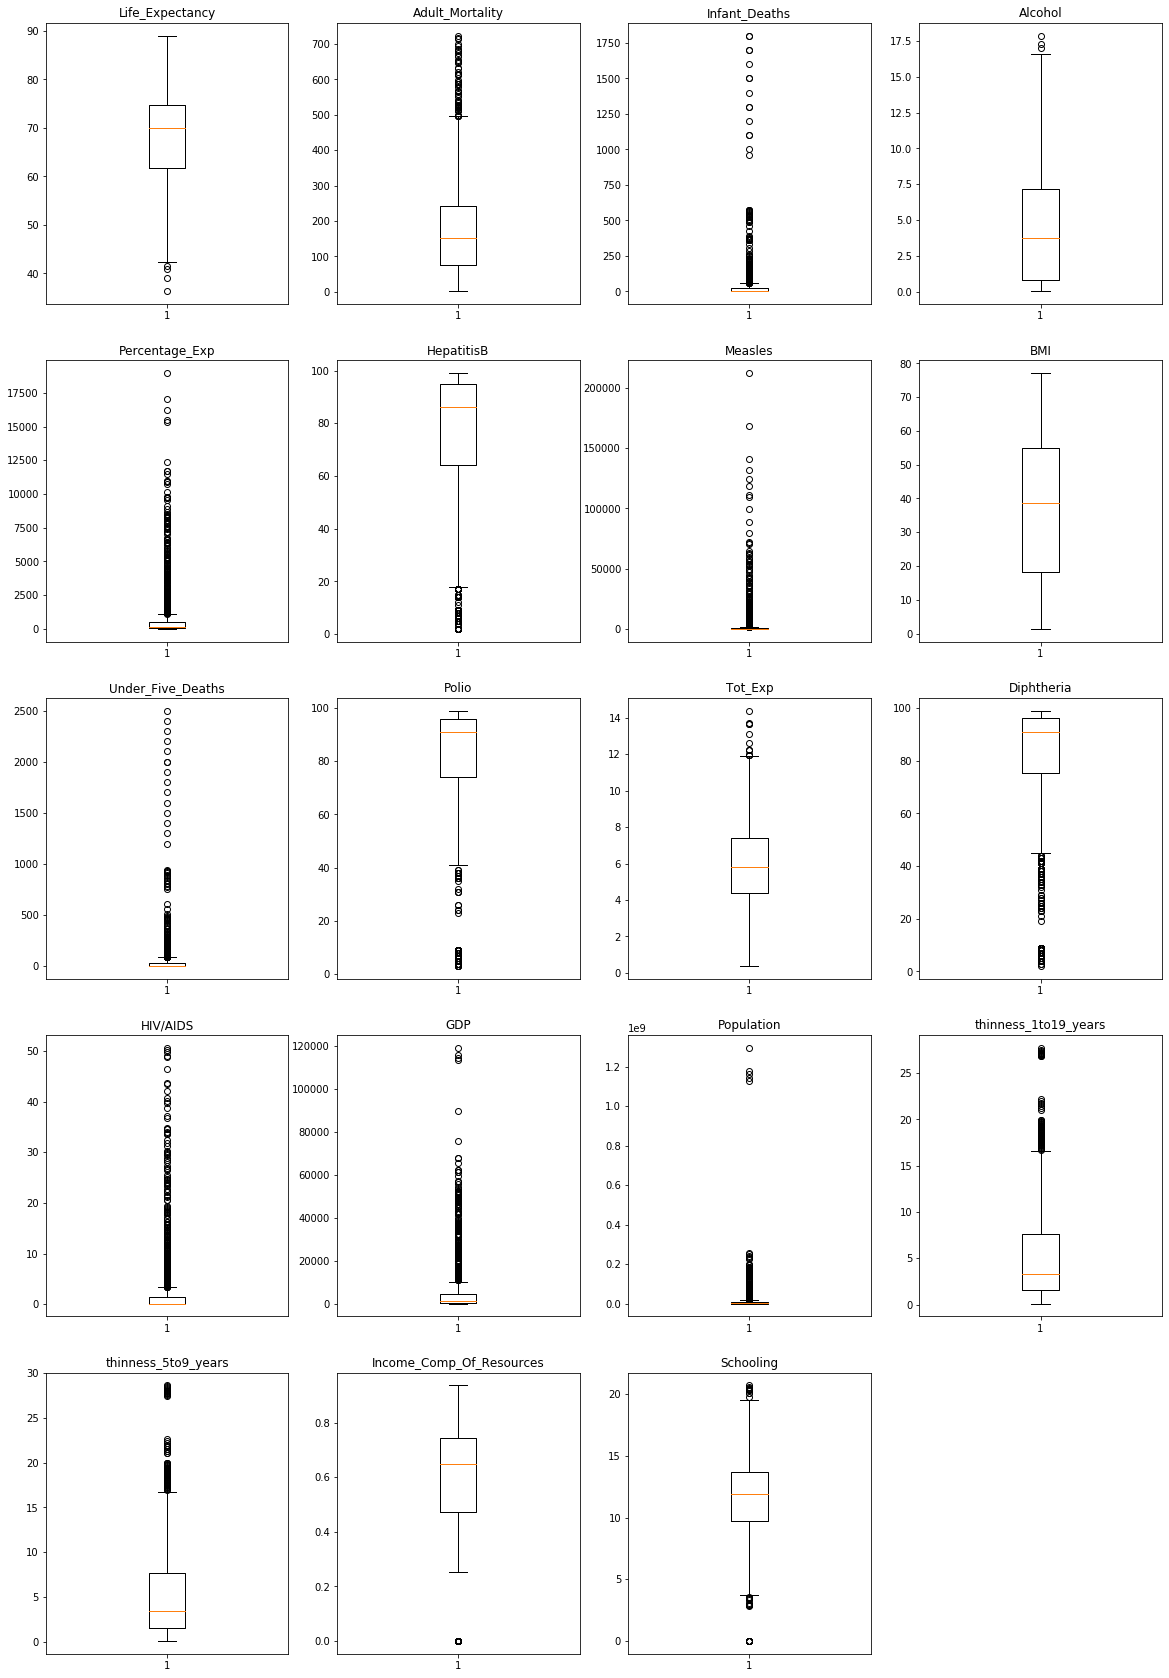

In [7]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}


plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [8]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                                len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

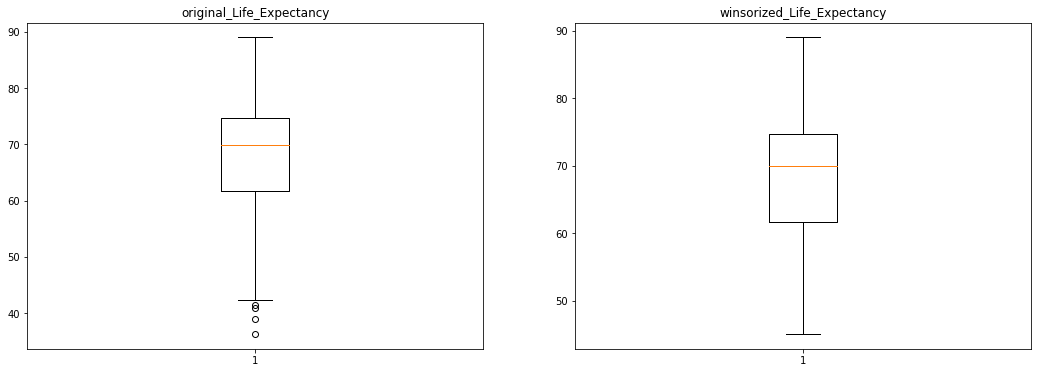

In [9]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = le['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(le['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

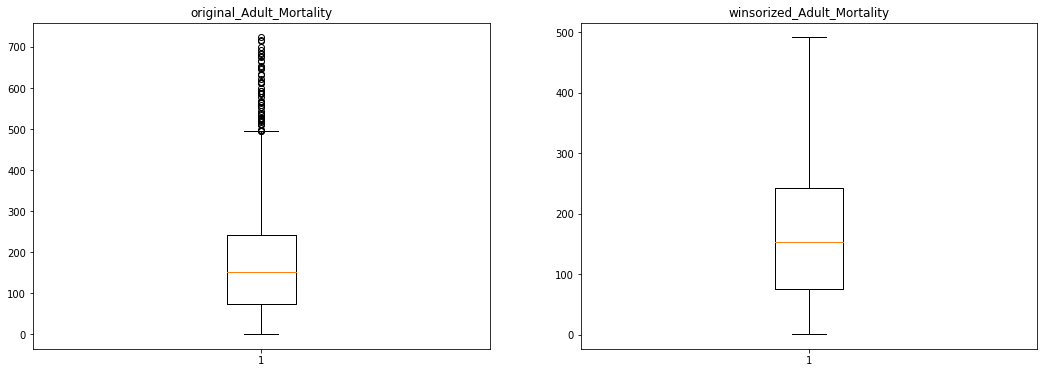

In [10]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = le['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(le['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

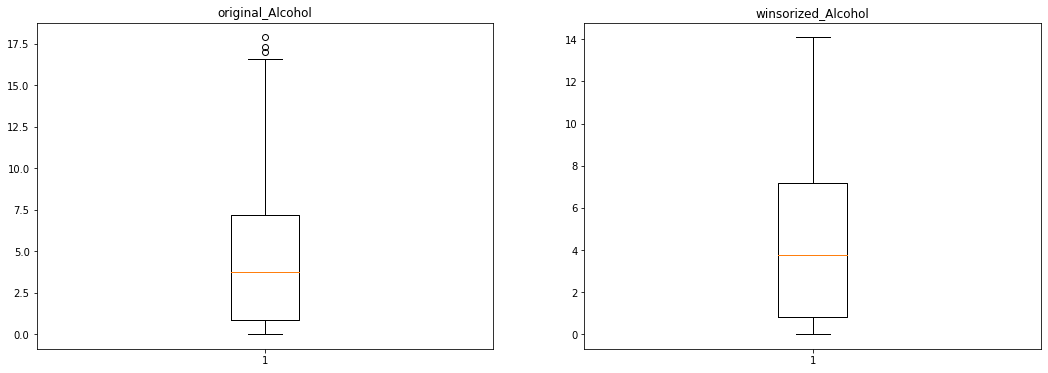

In [11]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = le['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(le['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

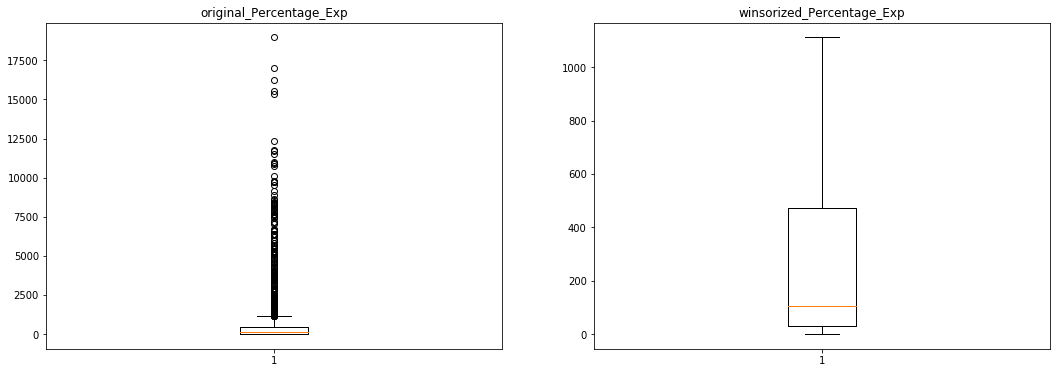

In [12]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = le['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(le['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

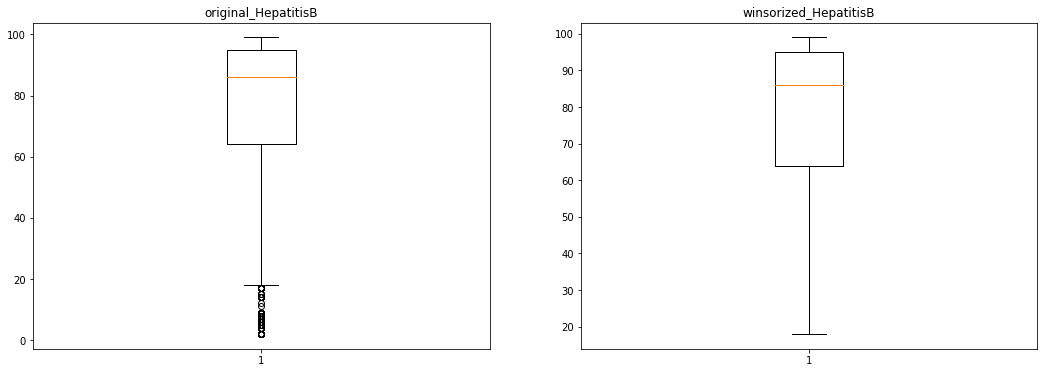

In [13]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = le['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(le['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

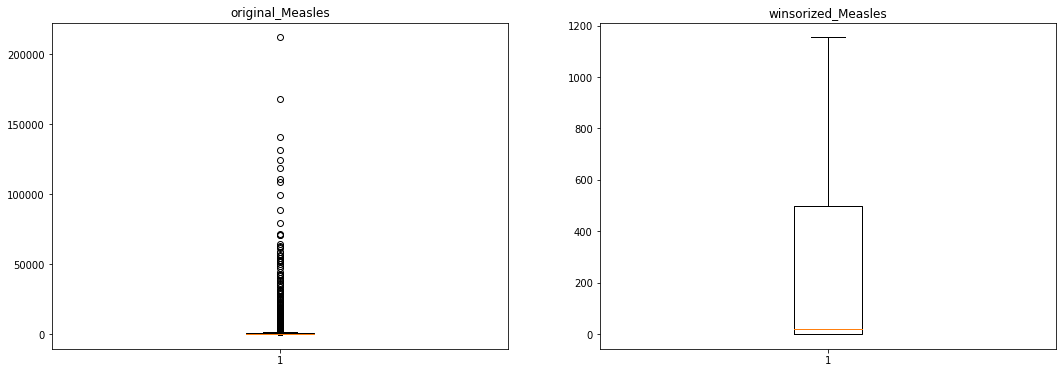

In [14]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = le['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(le['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [15]:
le = le.drop('Measles',axis=1)

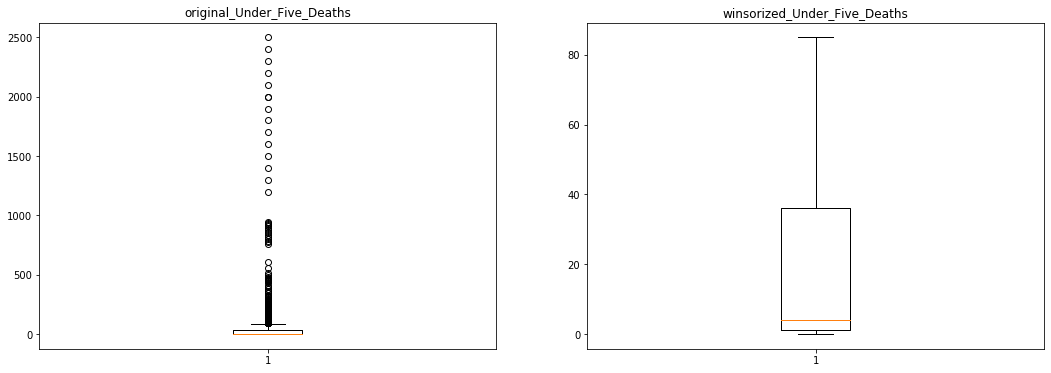

In [16]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = le['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(le['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

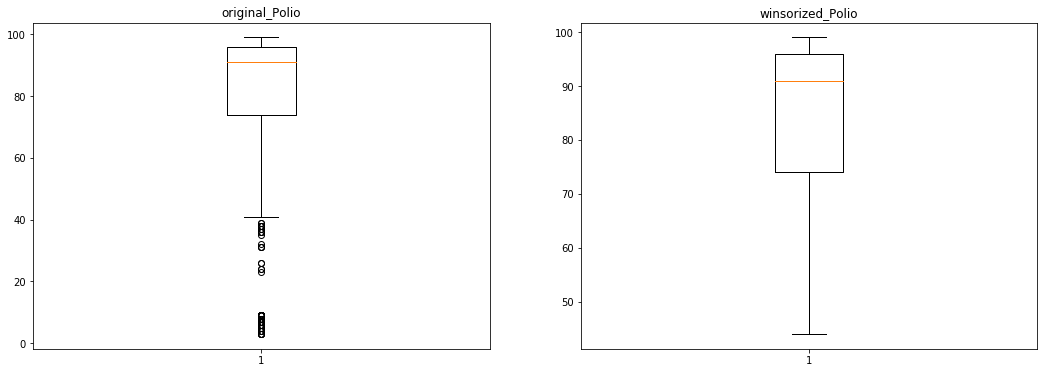

In [17]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = le['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(le['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

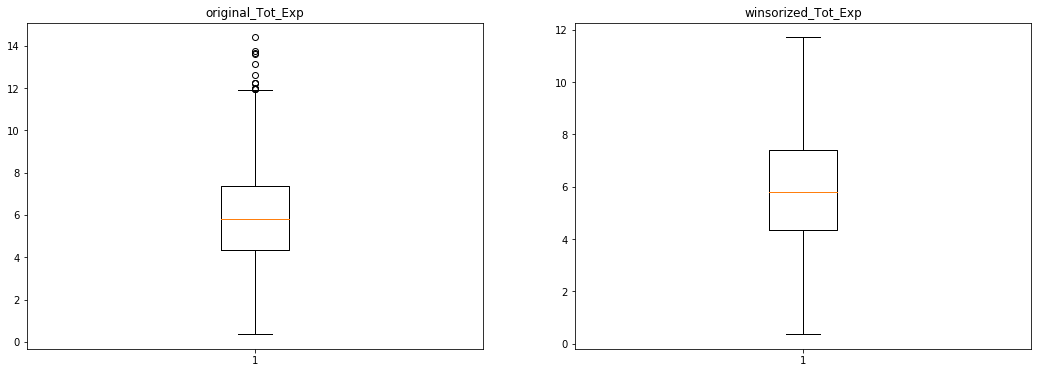

In [18]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = le['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(le['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

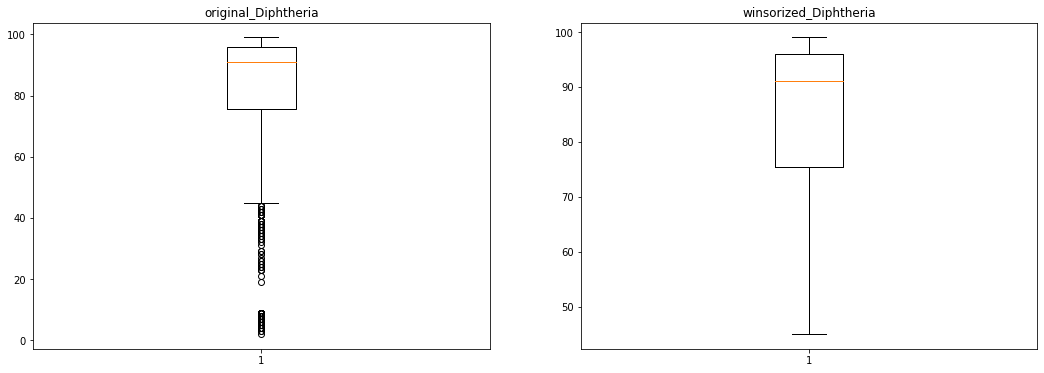

In [19]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = le['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(le['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

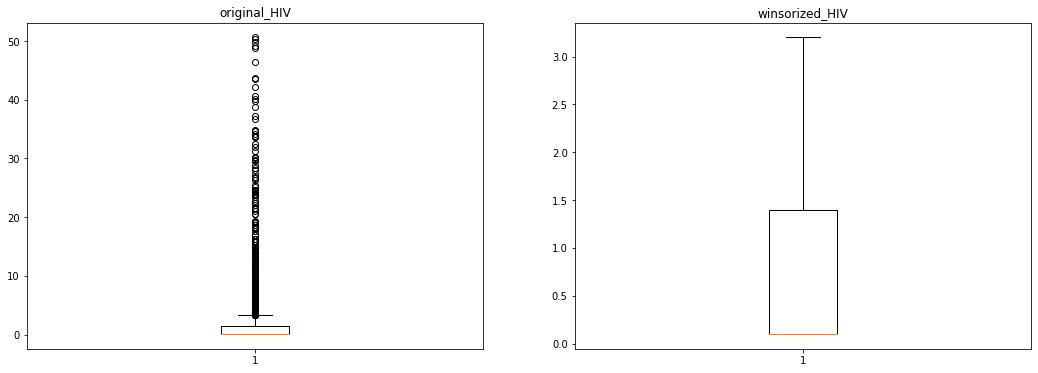

In [20]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = le['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(le['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

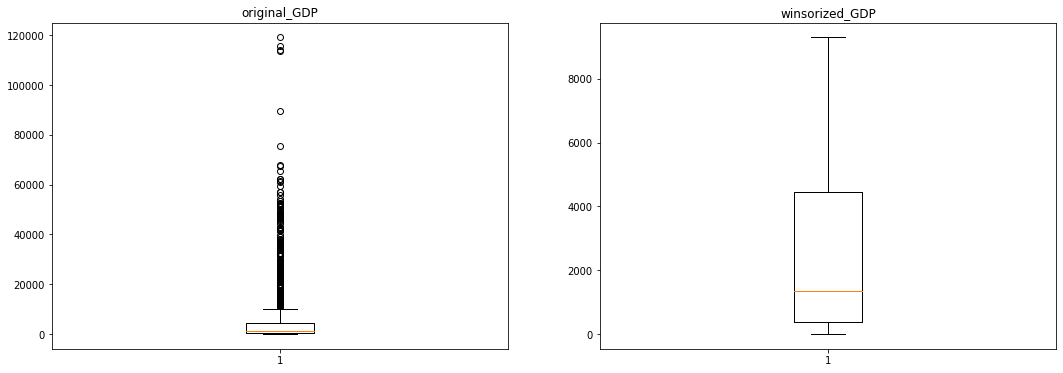

In [21]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = le['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(le['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

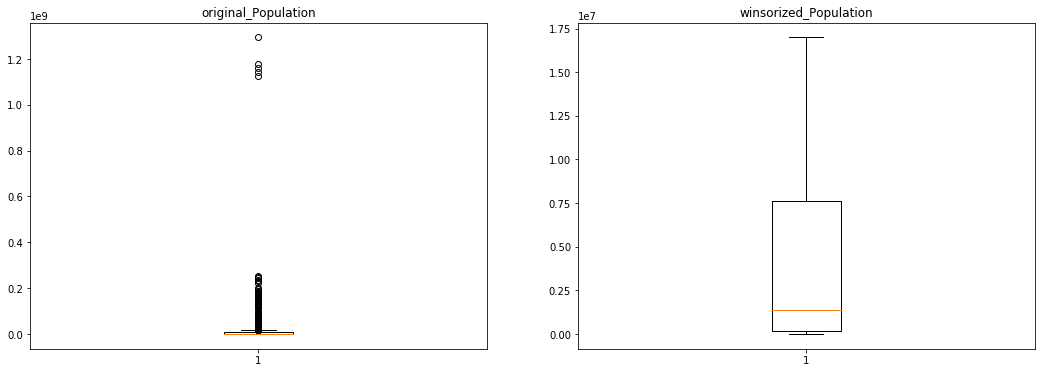

In [22]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = le['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(le['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

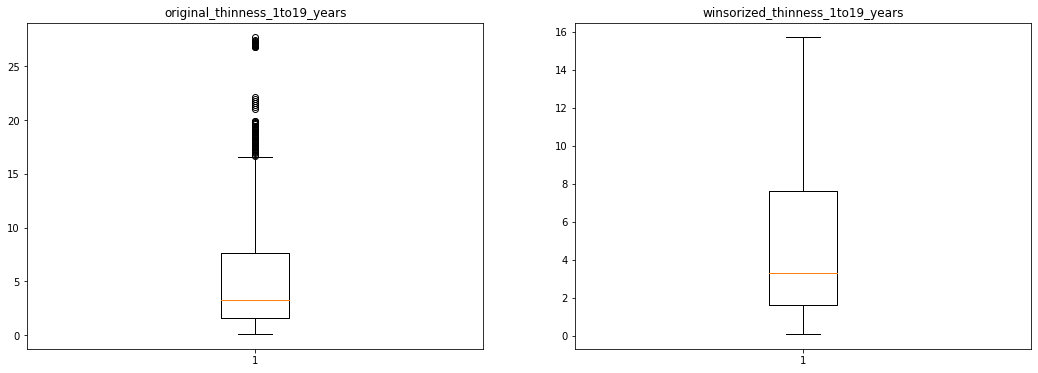

In [23]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = le['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(le['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

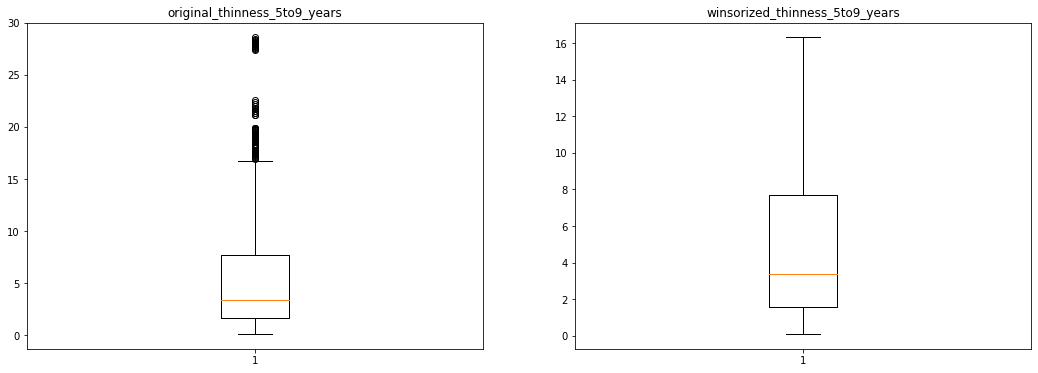

In [24]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = le['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(le['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

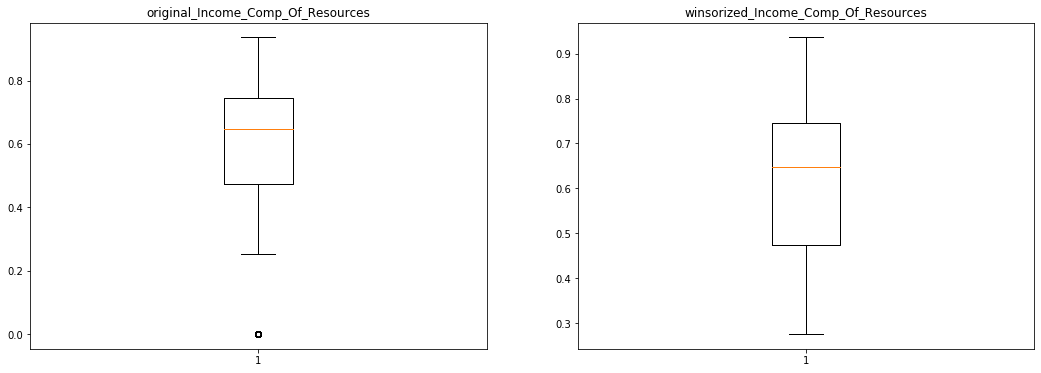

In [25]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = le['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(le['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

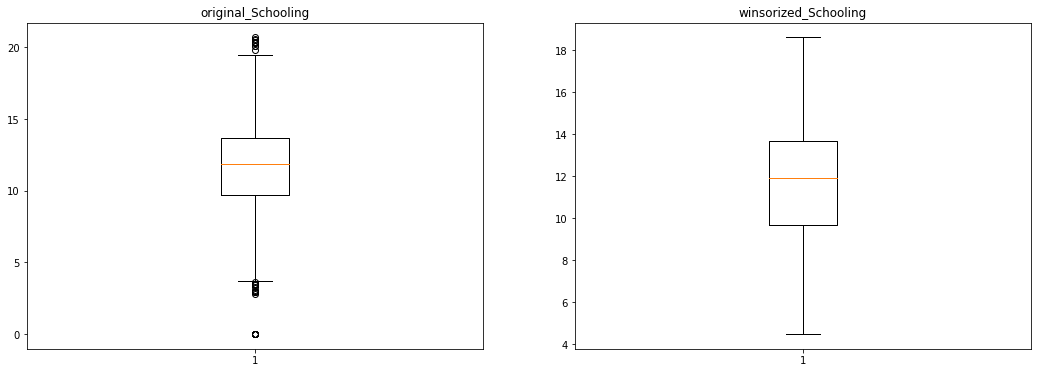

In [26]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = le['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(le['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

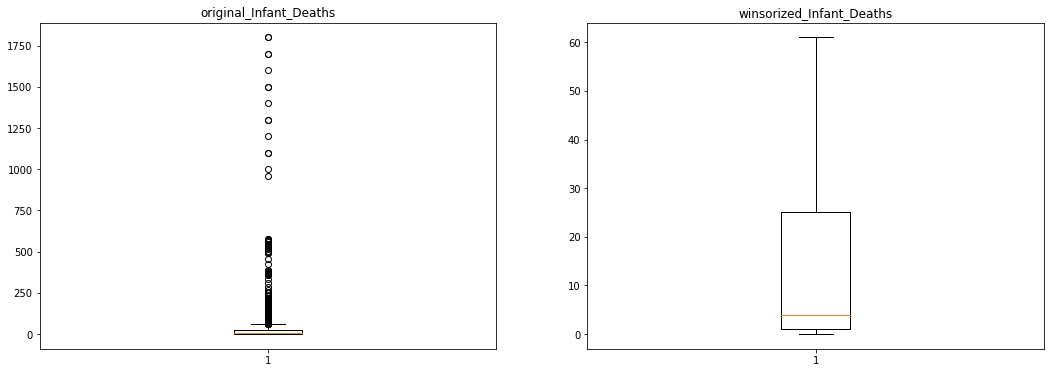

In [27]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = le['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(le['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

In [28]:
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    
    

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [29]:
le['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le['winsorized_Alcohol'] = winsorized_Alcohol
le['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le['winsorized_HepatitisB'] = winsorized_HepatitisB
le['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le['winsorized_Polio'] = winsorized_Polio
le['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le['winsorized_Diphtheria'] = winsorized_Diphtheria
le['winsorized_HIV'] = winsorized_HIV
le['winsorized_GDP'] = winsorized_GDP
le['winsorized_Population'] = winsorized_Population
le['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
le['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le['winsorized_Schooling'] = winsorized_Schooling

In [30]:
le

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,44.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,27.1,...,67.0,7.13,65.0,3.2,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,26.7,...,44.0,6.52,68.0,3.2,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,26.3,...,73.0,6.53,71.0,3.2,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,25.9,...,76.0,6.16,75.0,3.2,548.587312,12366165.0,1.6,1.7,0.427,9.8


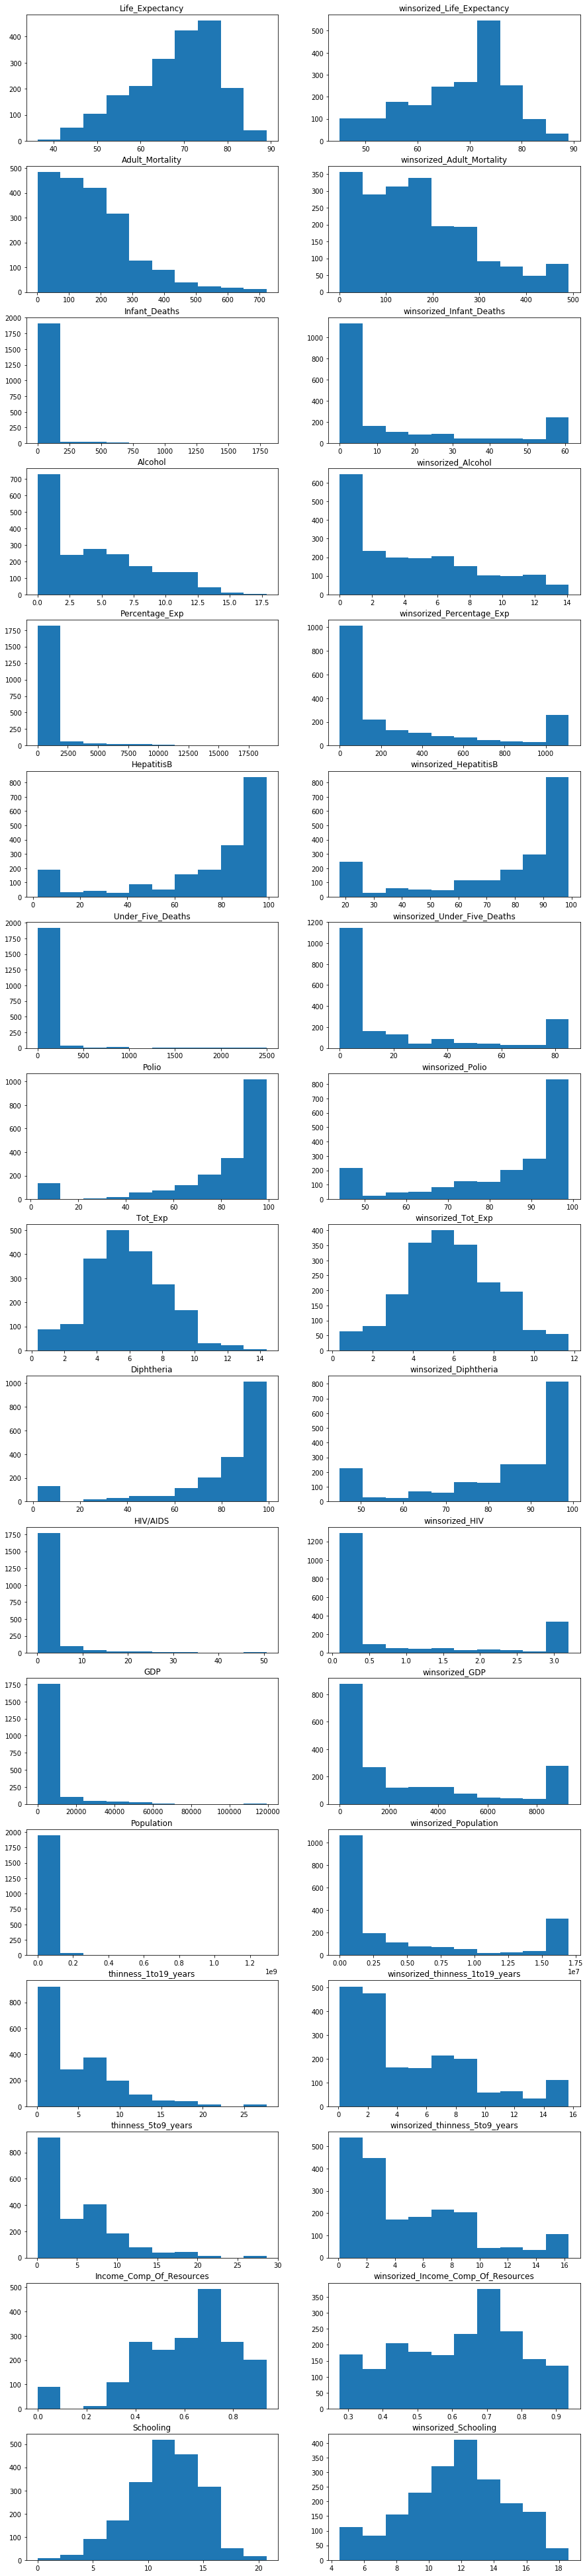

In [31]:
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(le[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [32]:
le.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


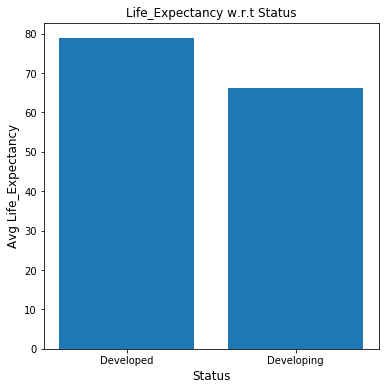

In [33]:
plt.figure(figsize=(6,6))
plt.bar(le.groupby('Status')['Status'].count().index,le.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

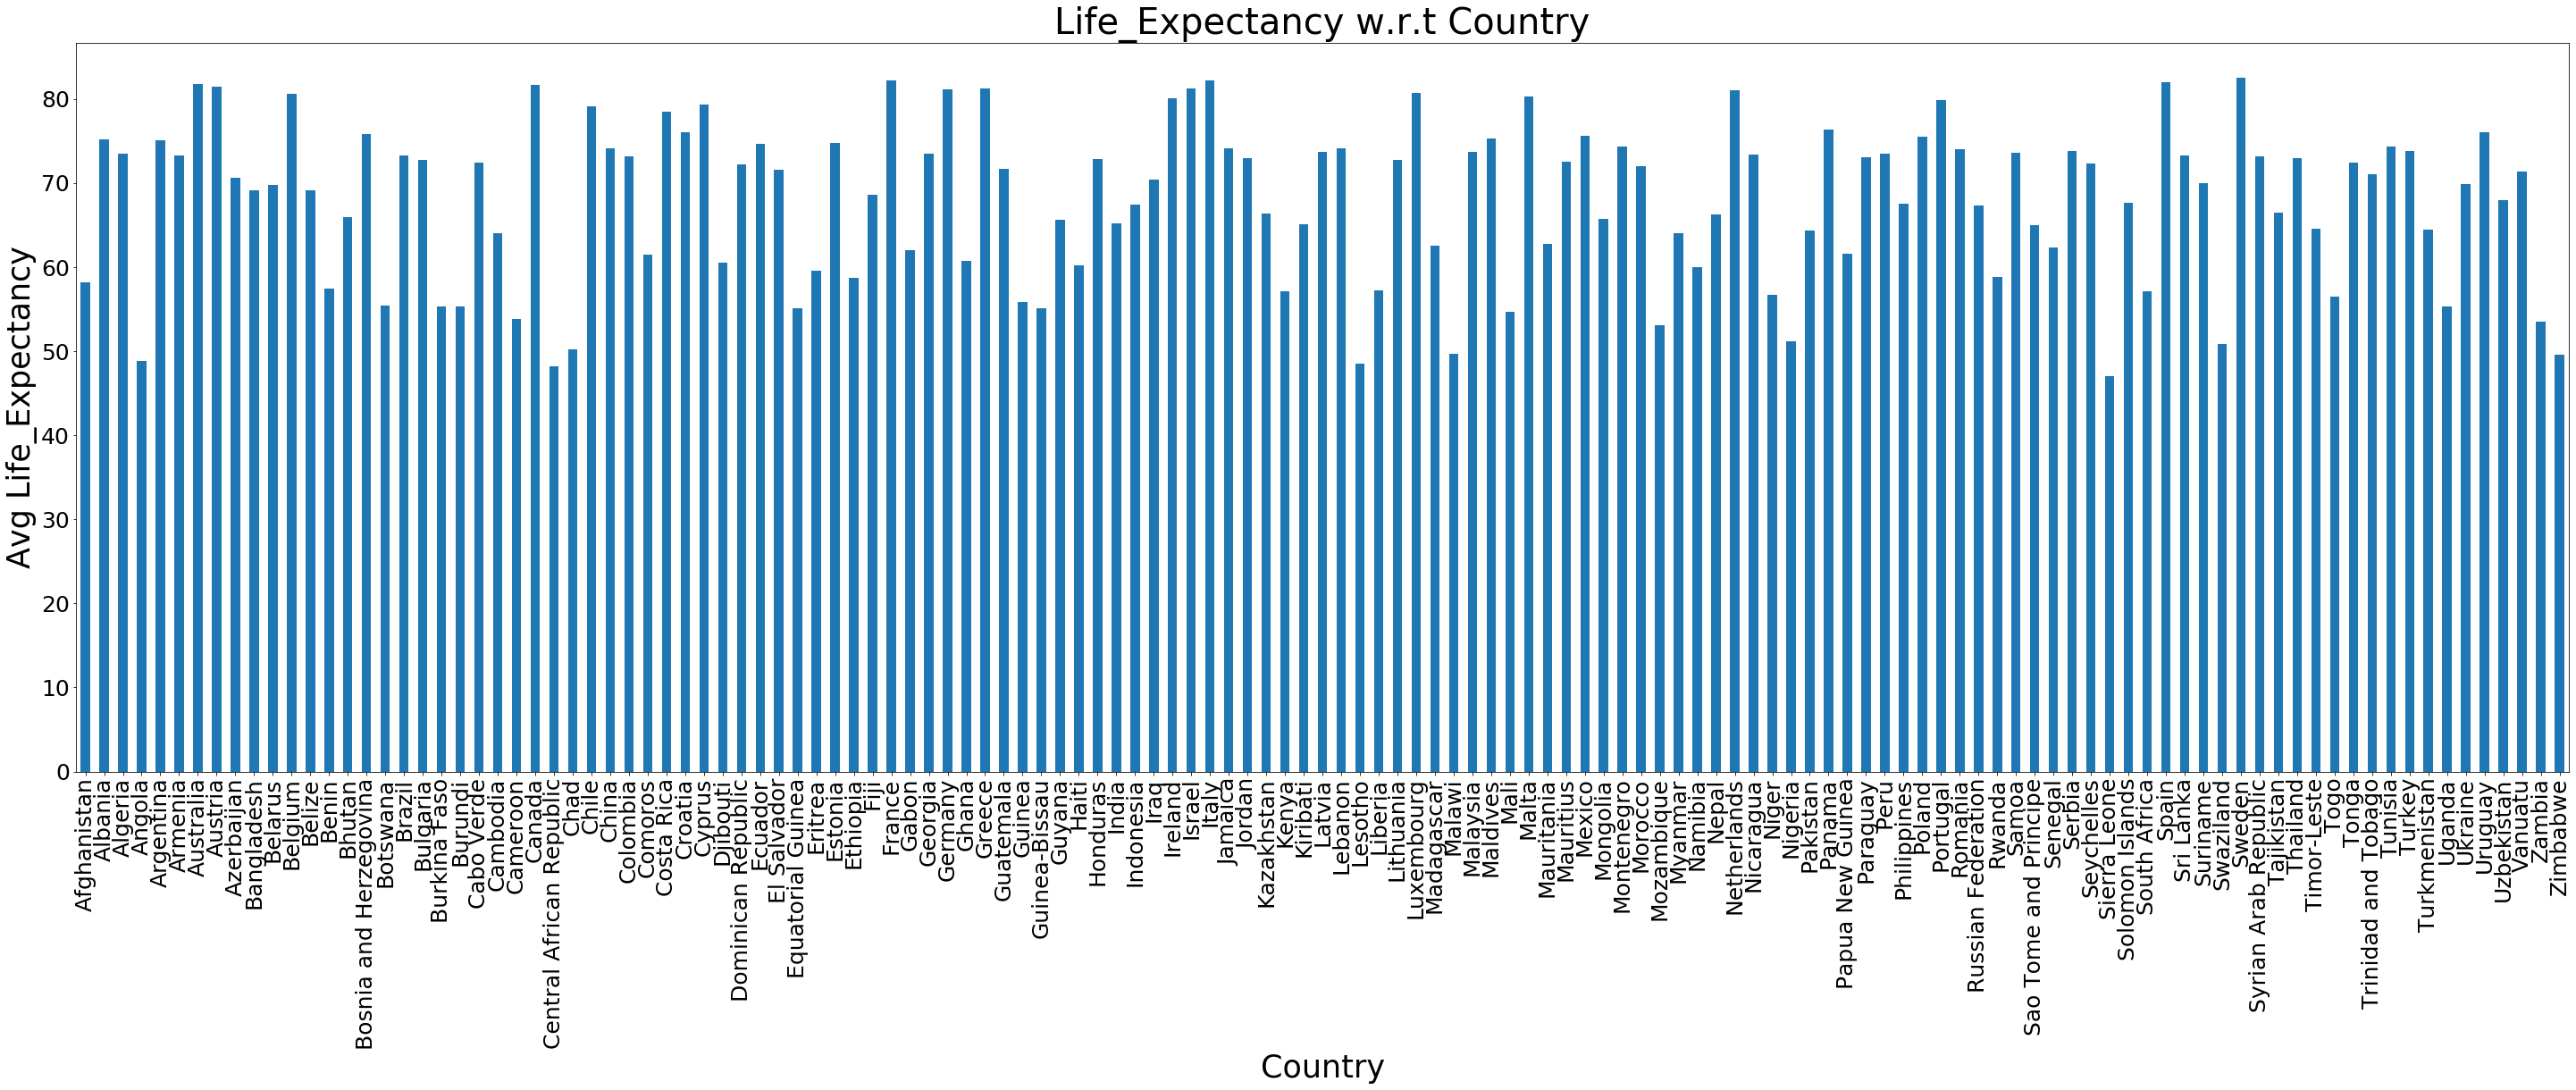

In [34]:
le_country = le.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

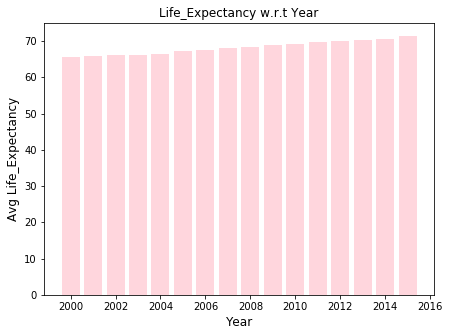

In [35]:
plt.figure(figsize=(7,5))
plt.bar(le.groupby('Year')['Year'].count().index,le.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

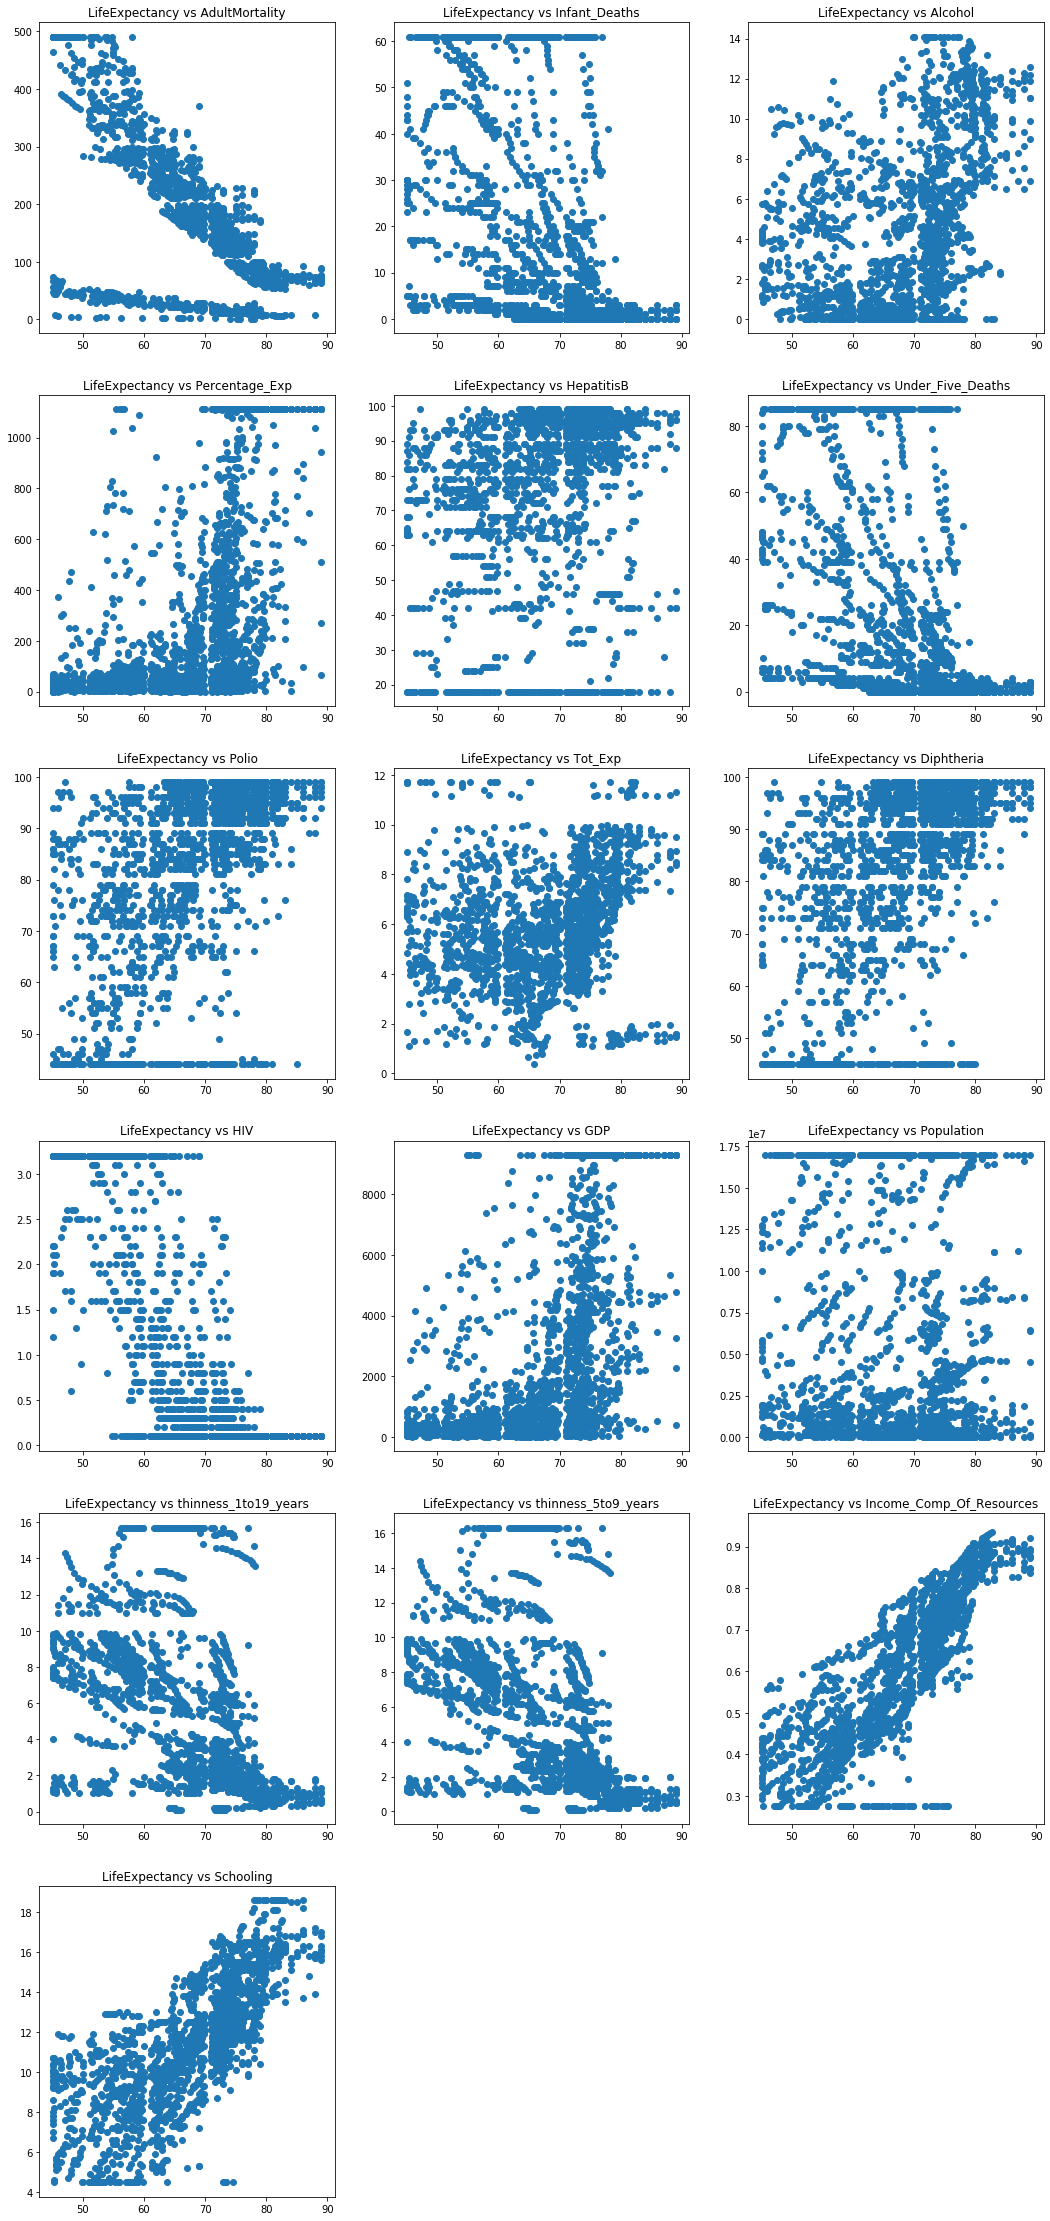

In [36]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

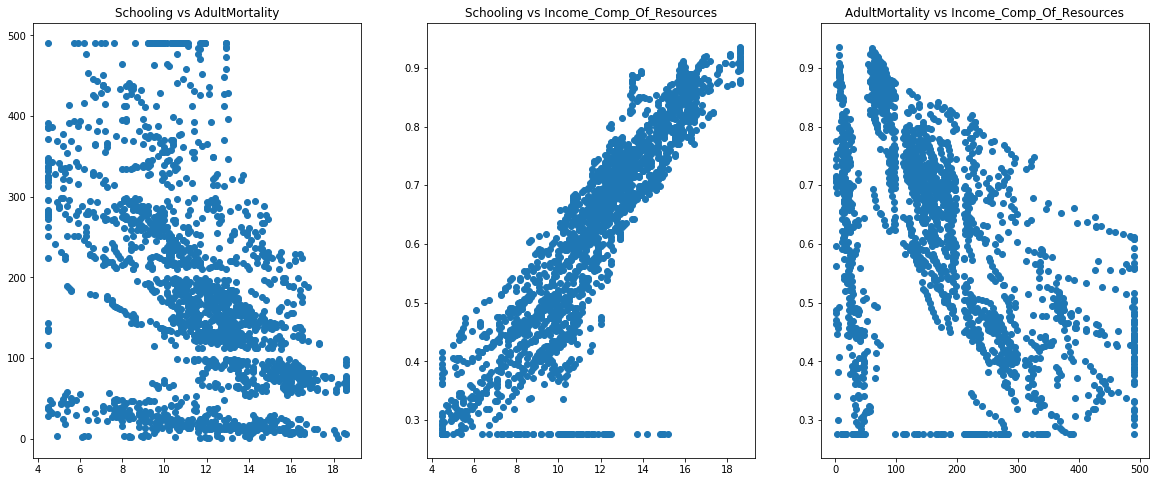

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(le["winsorized_Adult_Mortality"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

In [38]:
le_win = le.iloc[:,21:]
le_win['Country'] = le['Country']
le_win['Year'] = le['Year']
le_win['Status'] = le['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

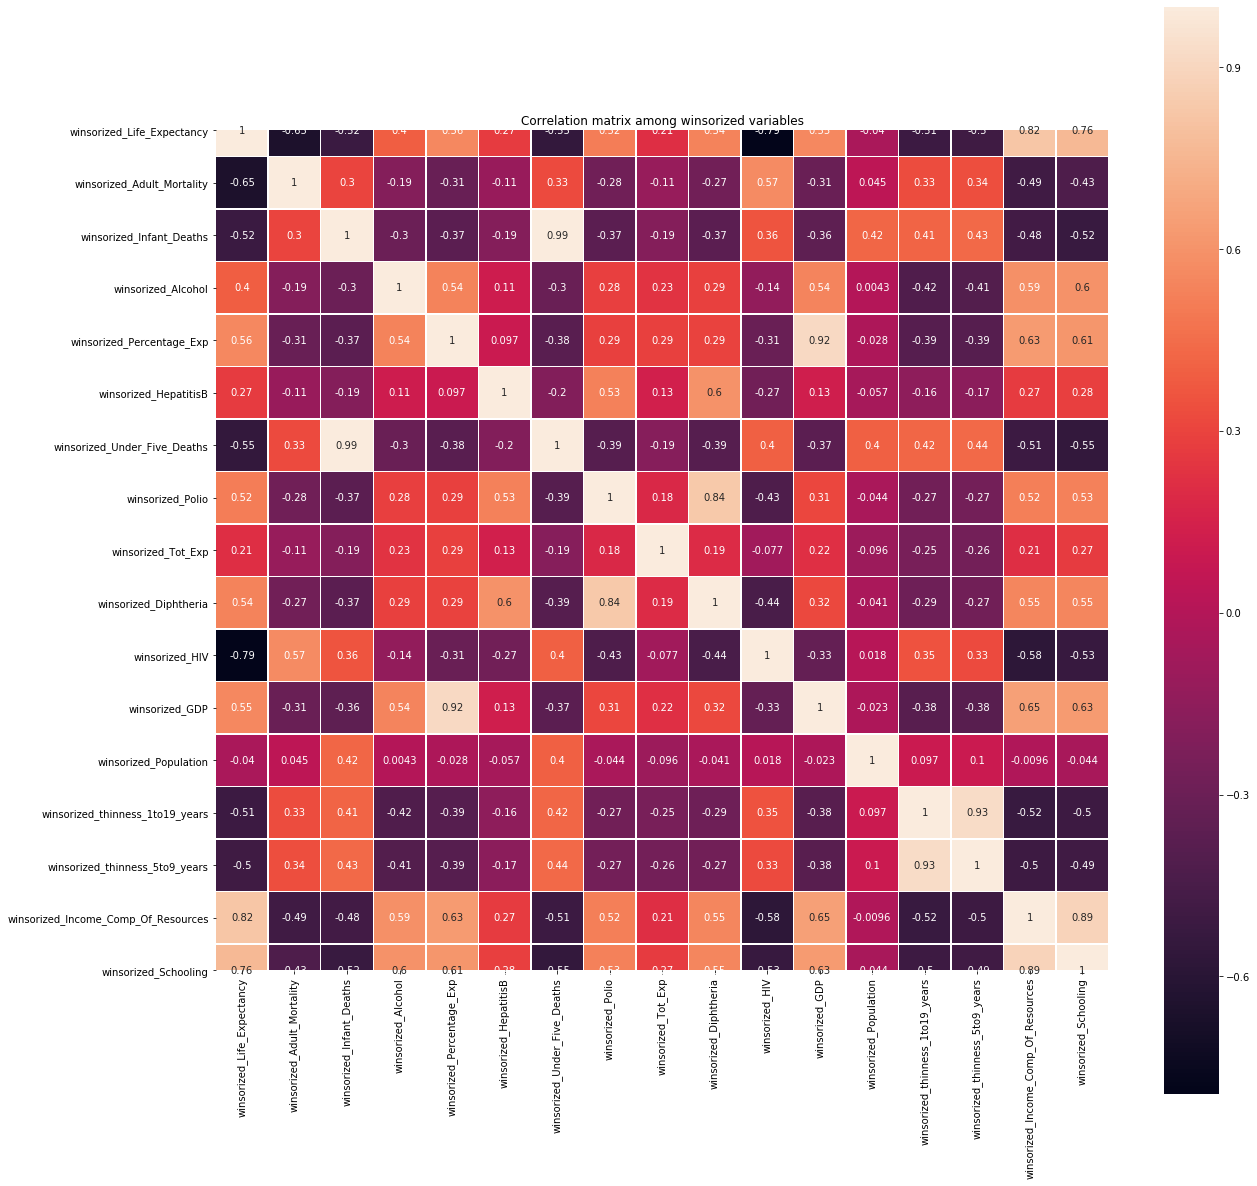

In [39]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [40]:
round(le[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)
#null hypothesis states that life expectancy of developed countries is greater than that of developing countries

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [41]:
import scipy.stats as stats
stats.ttest_ind(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy'])


Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [42]:
le[['Status','Life_Expectancy']].describe()


,Life_Expectancy
count,1987.000000
mean,67.981782
std,9.706401
min,36.300000
25%,61.700000
50%,69.900000
75%,74.700000
max,89.000000


In [43]:
round(le[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [44]:
print(stests.ztest(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy']))
print("From the result,we can say that the p-value falls under the rejection area and we can reject null hypothesis")
print("This is an example of Type-1 error")

(22.92439377113489, 2.65400307171692e-116)
From the result,we can say that the p-value falls under the rejection area and we can reject null hypothesis
This is an example of Type-1 error


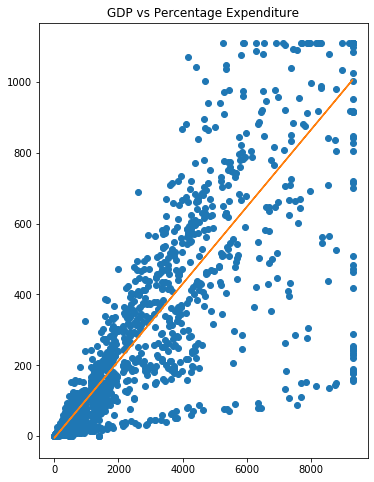

The correlation coefficient between WInsorized GDP and Winzorized Percentage Expenditure is:  0.915730935927633


In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(le["winsorized_GDP"], le["winsorized_Percentage_Exp"])
plt.title("GDP vs Percentage Expenditure")
a,b=polyfit(le["winsorized_GDP"], le["winsorized_Percentage_Exp"],1)
plt.plot(le["winsorized_GDP"], le["winsorized_Percentage_Exp"],'.')
plt.plot(le["winsorized_GDP"],a+b*le["winsorized_GDP"],'-')
plt.show()
print("The correlation coefficient between WInsorized GDP and Winzorized Percentage Expenditure is: ",le["winsorized_GDP"].corr(le["winsorized_Percentage_Exp"]))
#print(le["winsorized_GDP"].corr(le["winsorized_Life_Expectancy"]))

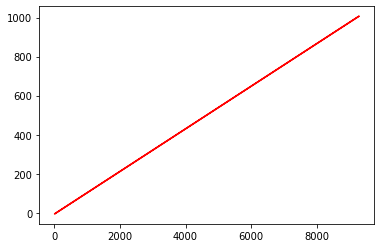

In [49]:
X = le["winsorized_GDP"].values.reshape(-1, 1)  
Y = le["winsorized_Percentage_Exp"].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  
#plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

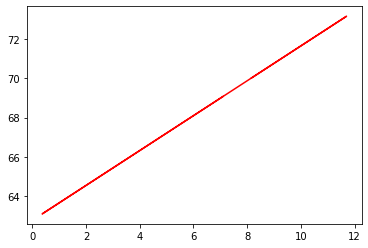

In [52]:
X1 = le["winsorized_Tot_Exp"].values.reshape(-1, 1)  
Y1 = le["winsorized_Life_Expectancy"].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X1, Y1)  
Y_pred1 = linear_regressor.predict(X1)  
#plt.scatter(X1, Y1)
plt.plot(X1, Y_pred1, color='red')
plt.show()